<a href="https://colab.research.google.com/github/Aisha-Hagar/Instance-Segmentation/blob/main/InstanceSegmentation_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Instance Segmentation**

The tutorial can be found here:

https://www.youtube.com/watch?v=ytlhMAF6ok0

In [1]:
#!pip install ultralytics
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstall

In [2]:
!pip install ultralytics==8.0.196

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 5.3 MB/s eta 0:00:00


In [3]:
from roboflow import Roboflow
import yaml
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import Image

In [4]:
# rf = Roboflow(api_key=<key>)
# project = rf.workspace("bassem-ahmed-ouwsa").project("dentistry-vbril")
# dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Dentistry-2 in yolov8:: 100%|██████████| 1139/1139 [00:00<00:00, 9568.58it/s]


In [5]:
%cat Dentistry-2/data.yaml

names:
- '11'
- '12'
- '13'
- '14'
- '15'
- '16'
- '17'
- '18'
- '21'
- '22'
- '23'
- '24'
- '25'
- '26'
- '27'
- '28'
- '31'
- '32'
- '33'
- '34'
- '35'
- '36'
- '37'
- '38'
- '41'
- '42'
- '43'
- '44'
- '45'
- '46'
- '47'
- '48'
- Crown
- Implant
- Root Canal
nc: 35
roboflow:
  license: CC BY 4.0
  project: dentistry-vbril
  url: https://universe.roboflow.com/bassem-ahmed-ouwsa/dentistry-vbril/dataset/2
  version: 2
  workspace: bassem-ahmed-ouwsa
test: test/images
train: train/images
val: valid/images


In [6]:
with open('Dentistry-2/data.yaml', 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [7]:
model = YOLO('yolov8n-seg.yaml')  # build a new model from YAML
model = YOLO('yolov8n-seg.pt')  # Transfer the weights from a pretrained model (recommended for training)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [8]:
#Define a project --> Destination directory for all results
project = 'Dentistry-2/results'
#Define subdirectory for this specific training
name = '100_epochs-' #note that if you run the training again, it creates a directory: 100_epochs-2

In [11]:
# Train the model
results = model.train(data='Dentistry-2/data.yaml',
                      project=project,
                      name=name,
                      epochs=100,
                      patience=0, #I am setting patience=0 to disable early stopping.
                      batch=4,
                      imgsz=800)

New https://pypi.org/project/ultralytics/8.0.231 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=Dentistry-2/data.yaml, epochs=100, patience=0, batch=4, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=Dentistry-2/results, name=100_epochs-, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=Fal

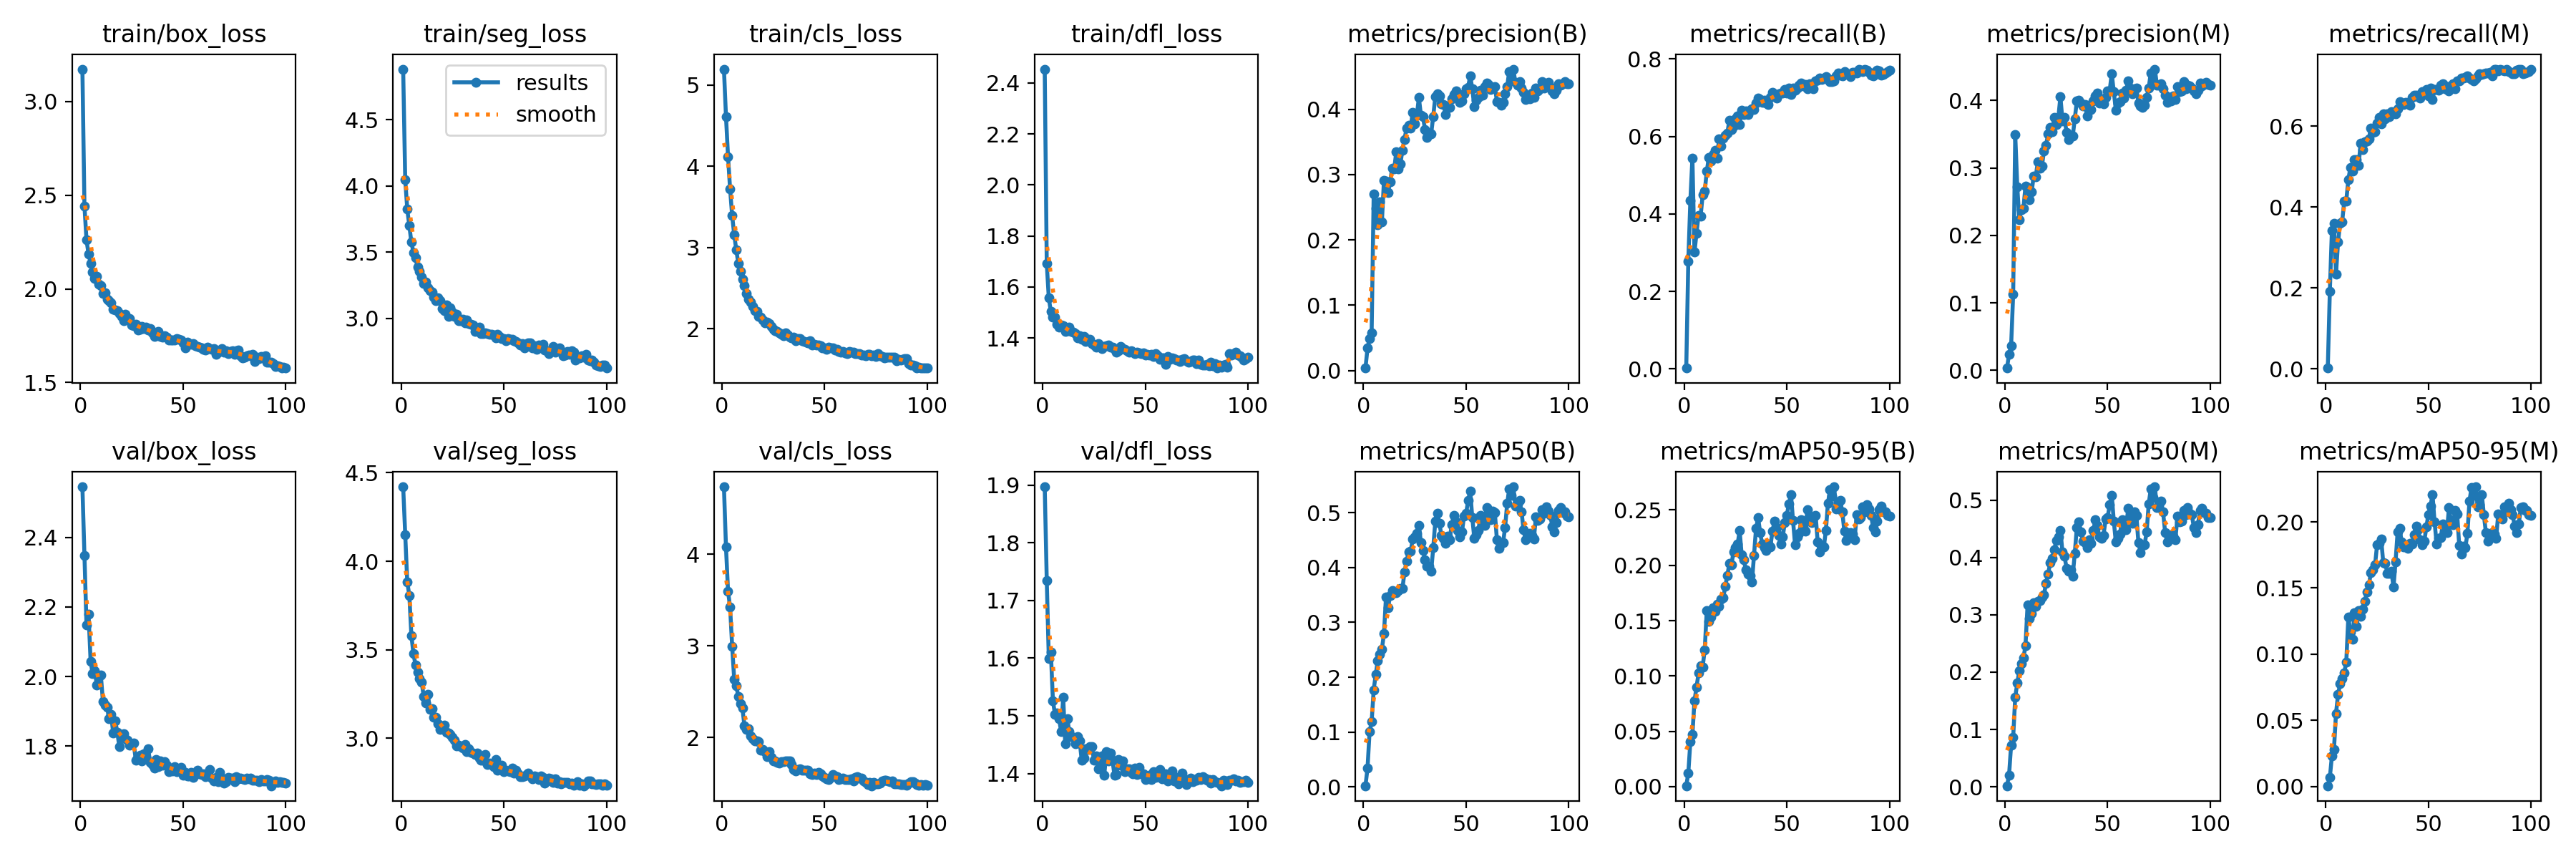

In [16]:
Image('Dentistry-2/results/100_epochs-3/results.png')

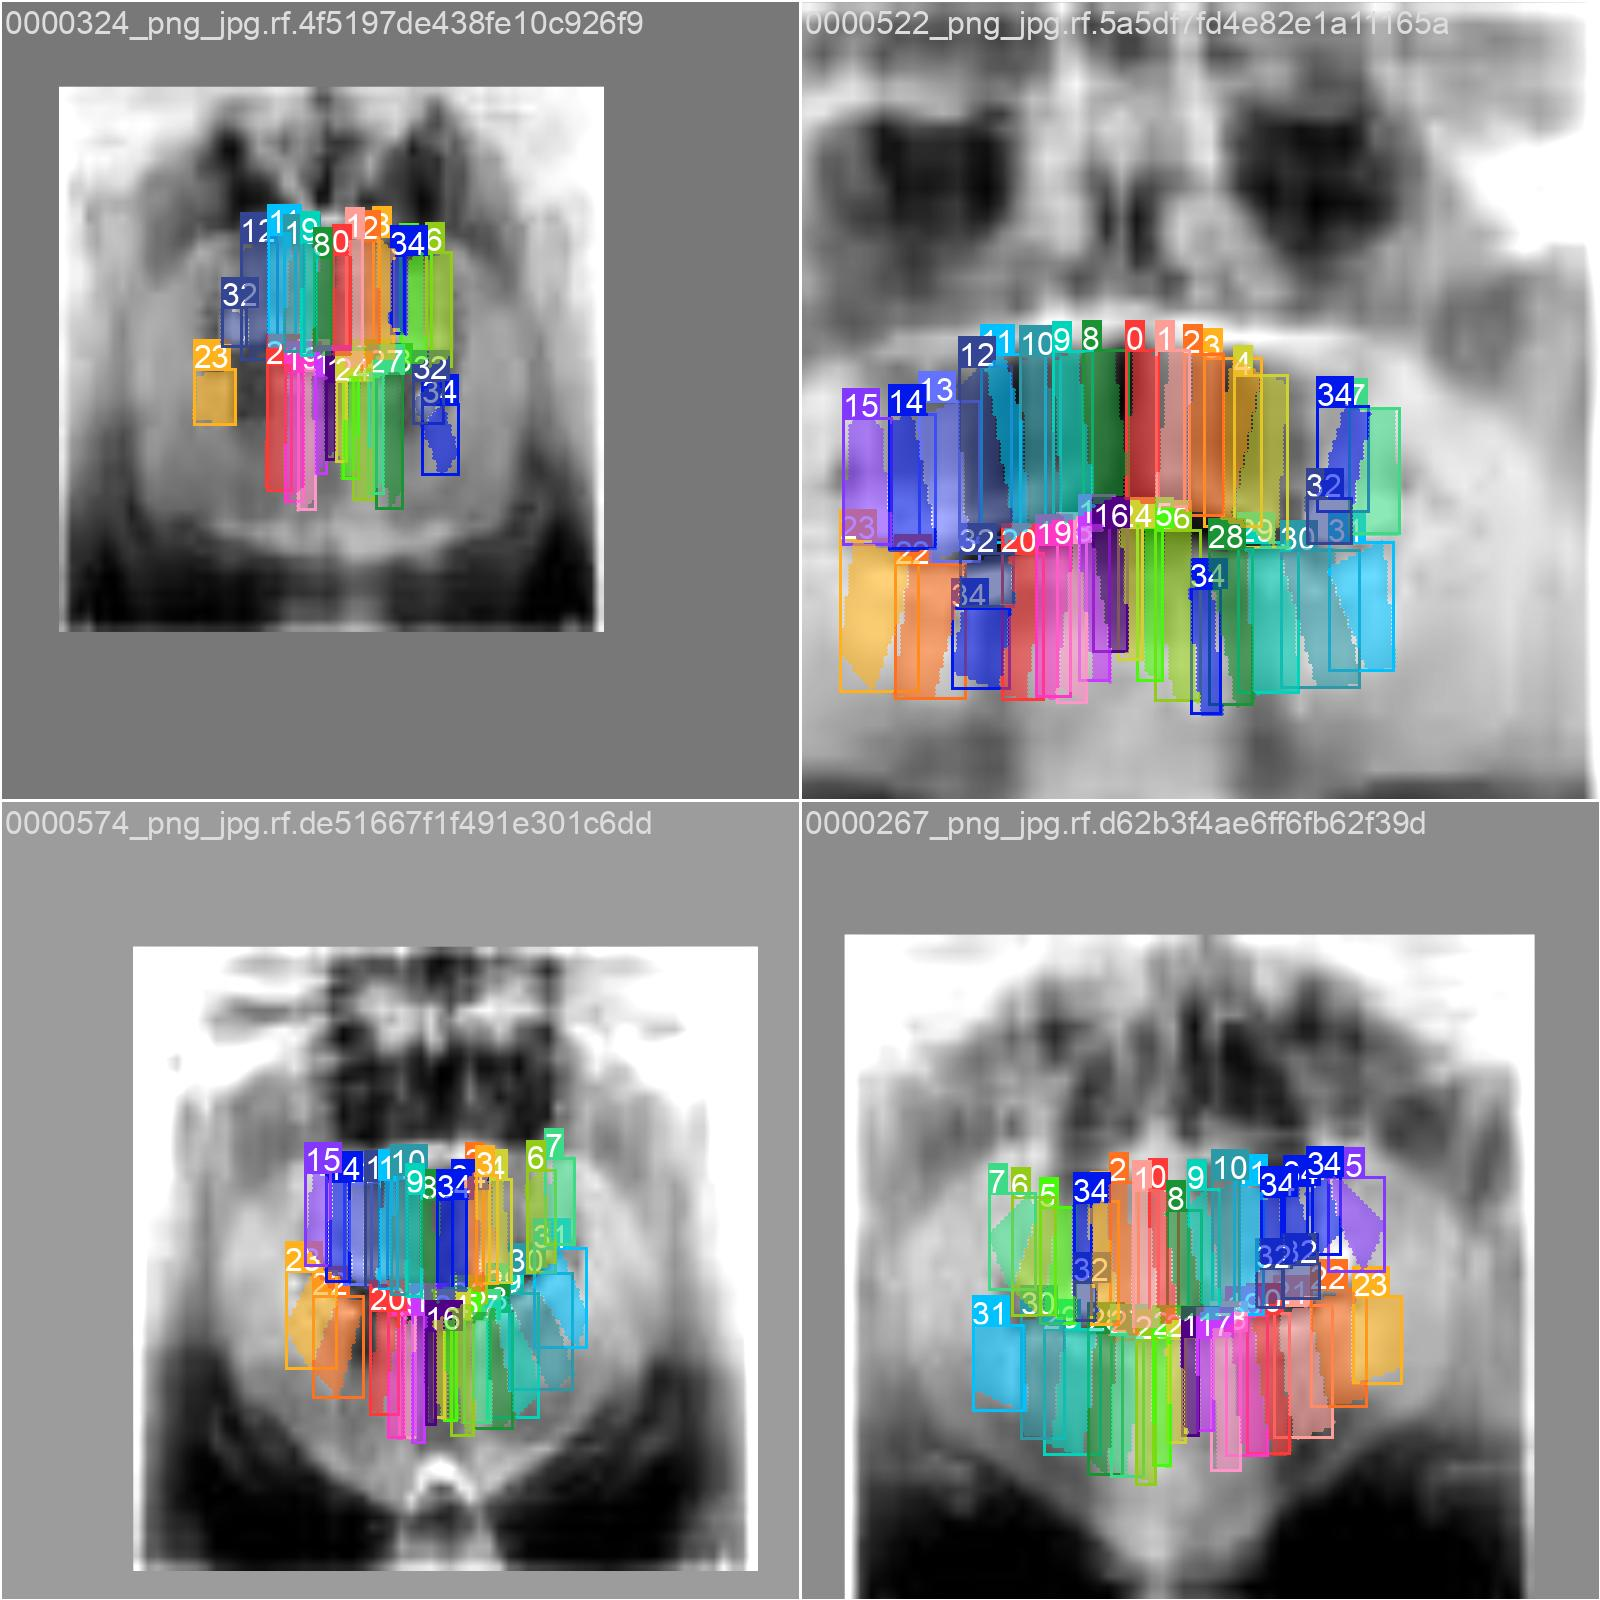

In [18]:
Image(filename='Dentistry-2/results/100_epochs-3/train_batch10172.jpg')

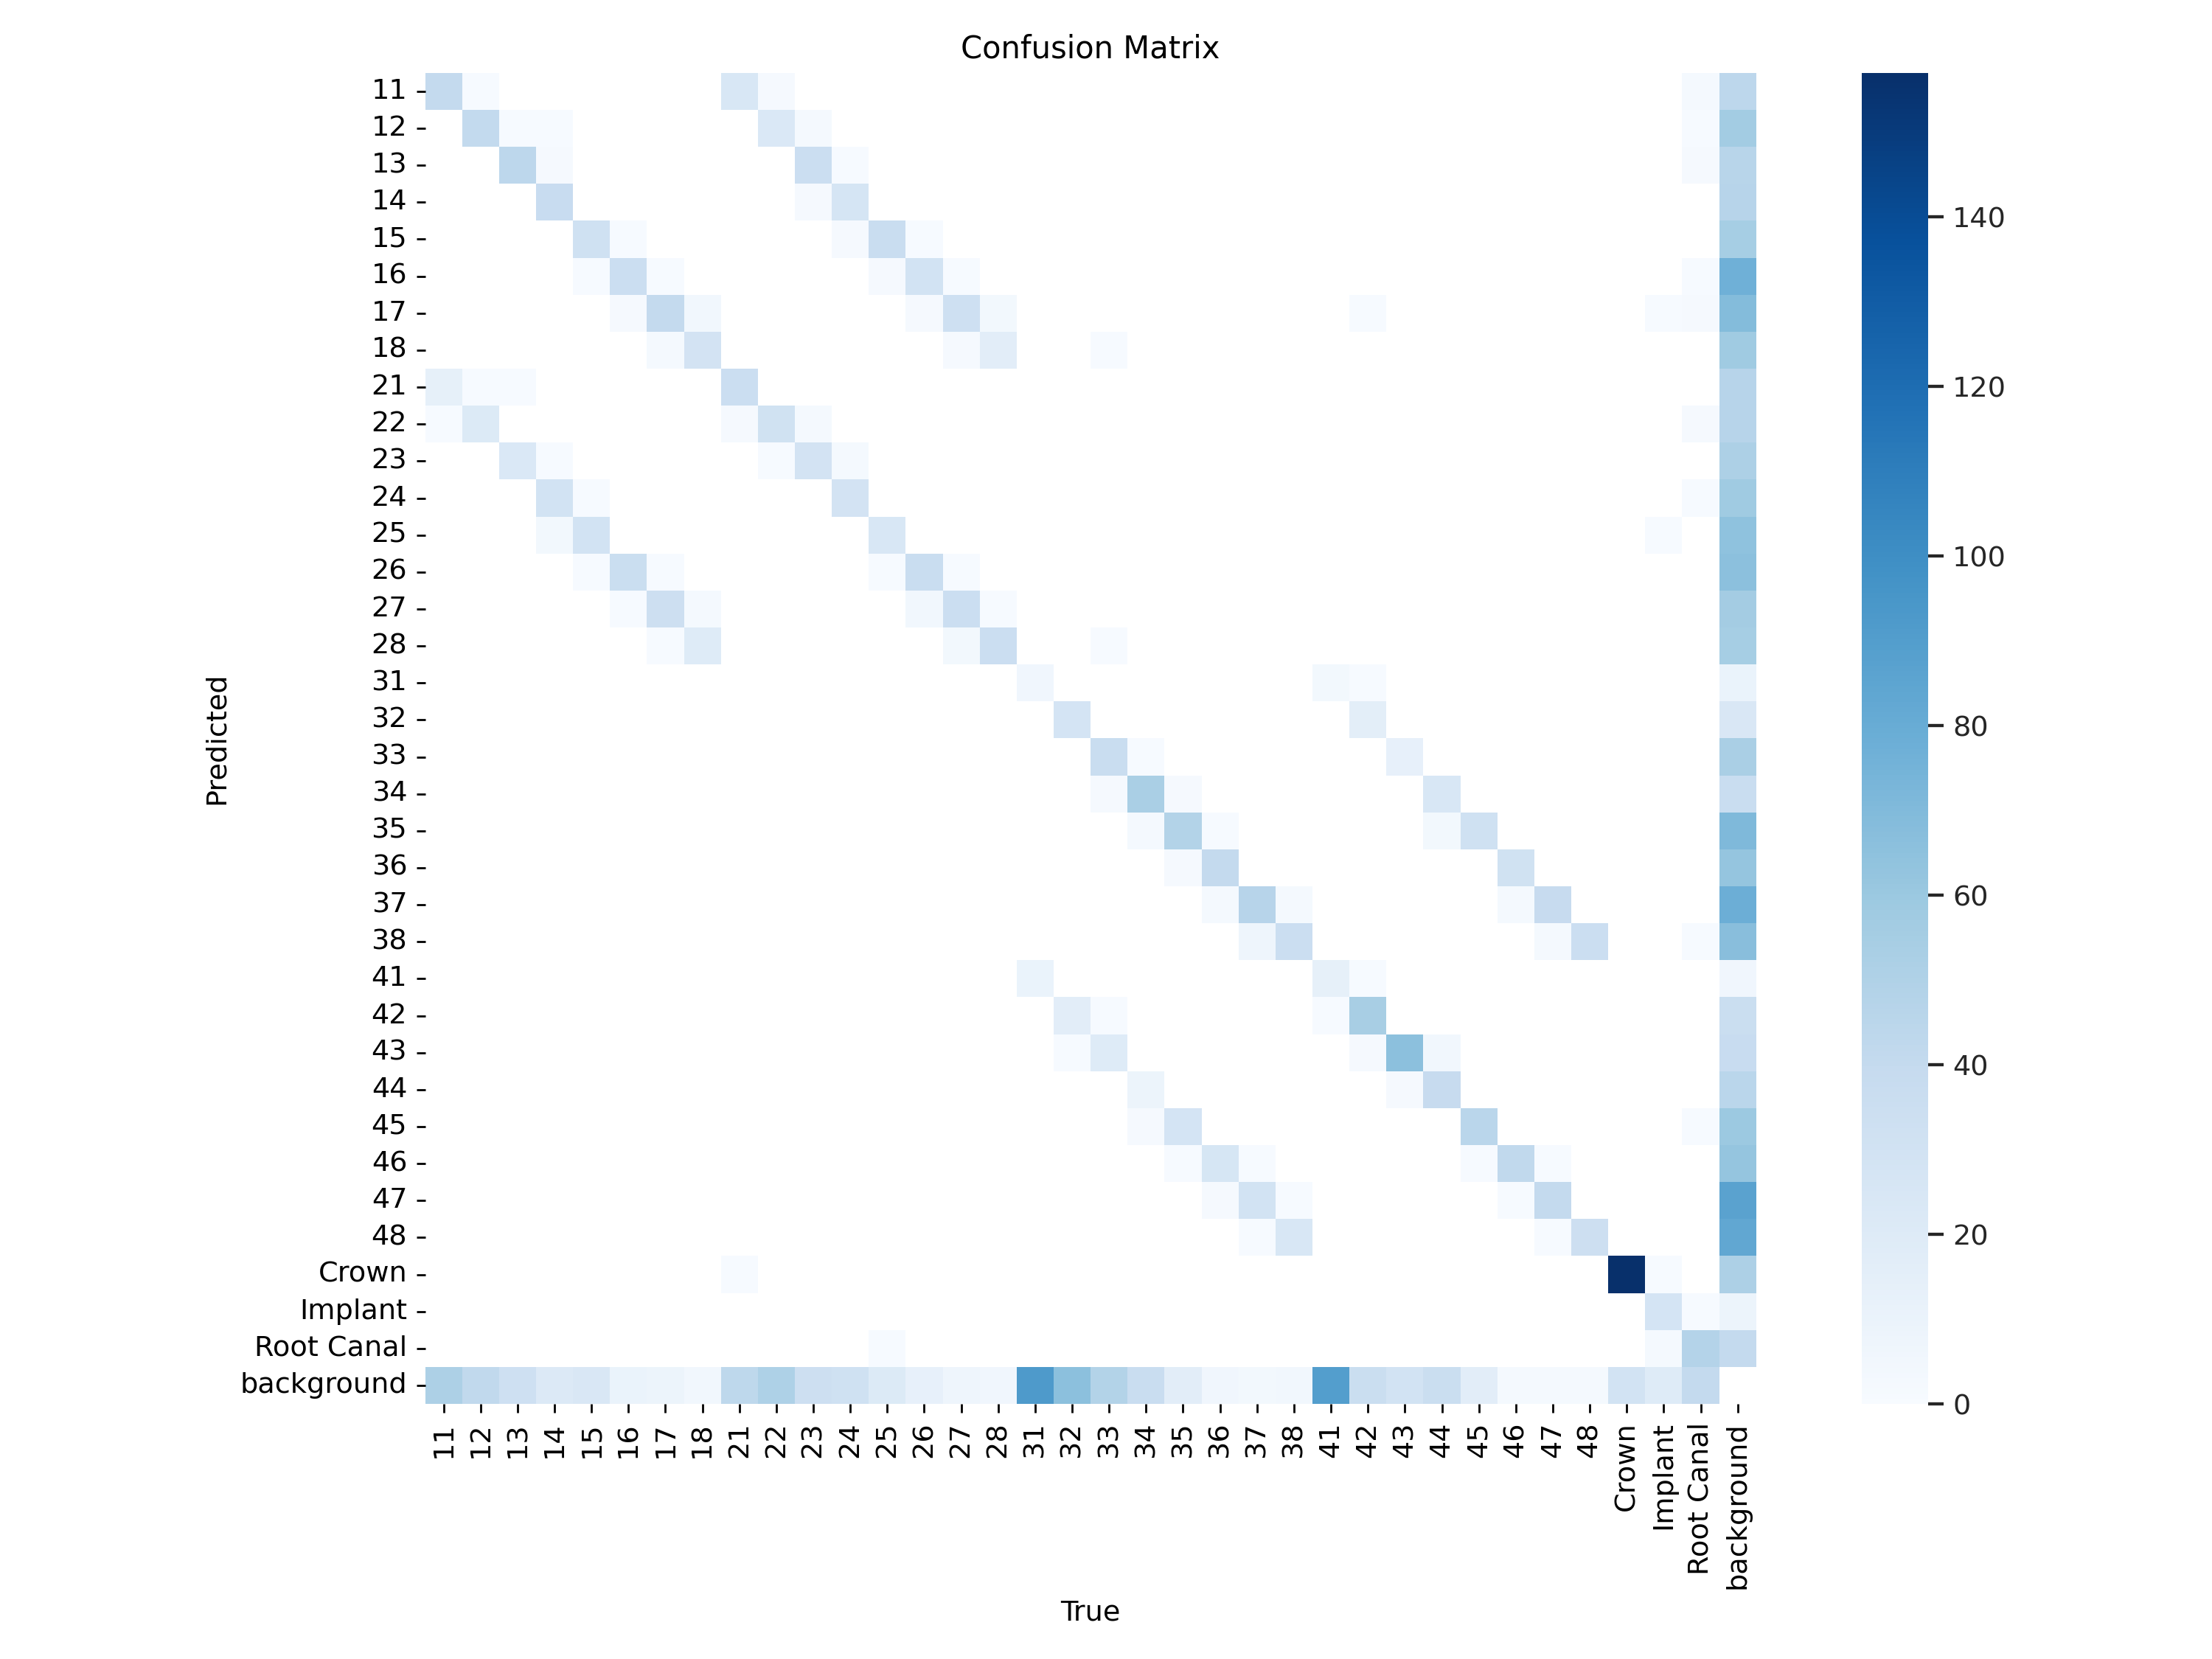

In [36]:
Image(filename='Dentistry-2/results/100_epochs-3/confusion_matrix.png')

In [21]:
best_model = YOLO('Dentistry-2/results/100_epochs-3/weights/last.pt')

In [33]:
new_image = 'Dentistry-2/valid/images/0000144_png_jpg.rf.aaaeadd7e8a15e69d1ee522095e12a07.jpg'
new_results = best_model.predict(new_image, conf=0.1)  #Adjust conf threshold


image 1/1 /content/Dentistry-2/valid/images/0000144_png_jpg.rf.aaaeadd7e8a15e69d1ee522095e12a07.jpg: 800x800 3 11s, 5 12s, 2 13s, 3 14s, 2 15s, 1 16, 1 17, 1 18, 4 21s, 3 22s, 1 23, 1 24, 2 25s, 2 26s, 2 27s, 1 28, 2 31s, 3 32s, 2 33s, 4 34s, 2 37s, 1 38, 3 41s, 2 42s, 3 43s, 4 44s, 2 45s, 1 46, 2 47s, 2 48s, 17.8ms
Speed: 4.2ms preprocess, 17.8ms inference, 36.4ms postprocess per image at shape (1, 3, 800, 800)


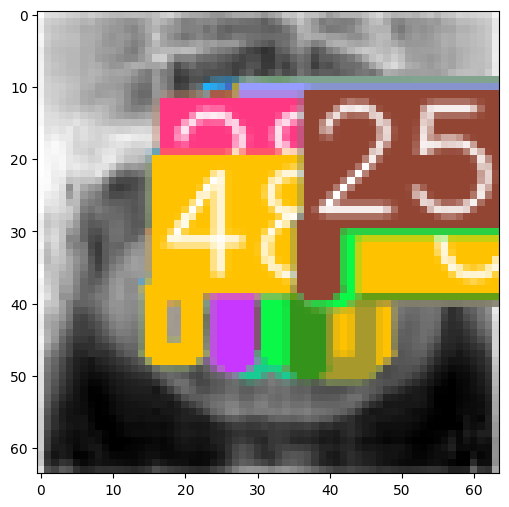

In [34]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(6, 6))
plt.imshow(new_result_array)